In [3]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (np, plt)

from sectional_v2.data_info import get_nice_name_case
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.imports.get_fld_fixed import get_field_fixed
from sectional_v2.util.plot.plot_levlat import plot_levlat_diff, get_cbar_eq_kwargs, make_cbar_kwargs
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from sectional_v2.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr


# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from sectional_v2.util.slice_average.significance import load_and_plot_sign

In [5]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [6]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

## Cases

In [7]:
cases_sec = ['SECTv21_ctrl_koagD']
cases_orig = ['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd']
# cases_orig =['noSECTv21_ox_ricc']

cases = cases_orig + cases_sec

In [8]:
version = 'v21dd'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

In [9]:
def load_and_plot_diffs(varl, case_ctrl, case_other, start_time, end_time,
                        pressure_coords=True,
                        relative=False,
                        cbar_orient='vertical',
                        asp_ratio=2, subfig_size=3,
                        ncol=None,
                        ylim=None,
                        yscale='log',
                        norm=None
                        ):
    if ylim is None:
        ylim = [1e3, 100]
    cases_dict = get_averaged_fields.get_levlat_cases(cases, varl, start_time, end_time,
                                                      pressure_adjust=pressure_coords)
    _nv = len(varl)
    if ncol is None:
        if _nv > 3:
            ncol = 2
        else:
            ncol = 1
    # noinspection PyUnresolvedReferences
    nrow = int(np.ceil(_nv / ncol))
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for ax, var in zip(axs.flat, varl):
        plot_levlat_diff(var, case_ctrl, case_other, cases_dict,
                         cbar_orientation=cbar_orient,
                         relative=relative,
                         ylim=ylim,
                         yscale=yscale,
                         ax=ax,
                         norm=norm)

    return axs


def load_and_plot_diffs_more_cases(varl, cases, case_oth, startyear, endyear,
                                   pressure_adjust=pressure_adjust,
                                   relative=False,
                                   cbar_orientation='vertical',
                                   asp_ratio=2, subfig_size=3,
                                   ylim=None,
                                   yscale='log',
                                   cbar_eq=True,
                                   norm=None):
    if ylim is None:
        ylim = [1e3, 100]
    imp_cases = list(set(cases).union({case_oth}))
    print(imp_cases)
    cases_dic = get_averaged_fields.get_levlat_cases(imp_cases, varl, startyear, endyear,
                                                     pressure_adjust=pressure_adjust)
    ncol = len(cases)
    nrow = len(varl)
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for j, var in enumerate(varl):
        saxs = axs[j, :]
        levlat_more_cases_var(var, case_oth, cases, cases_dic, cbar_eq, cbar_orientation, saxs, norm, relative, ylim,
                              yscale)
    return axs


def levlat_more_cases_var(var, case_oth, cases, cases_dic, cbar_eq=True, cbar_orientation='vertical', axs=None,
                          norm=None, relative=False, ylim=None, yscale='log'):
    if ylim is None:
        ylim = [1e3, 100]
    if cbar_eq:
        cba_kwargs = get_cbar_eq_kwargs(cases, case_oth, relative, cases_dic, var)
        if norm is not None:
            del cba_kwargs['vmin']
            del cba_kwargs['vmax']
            del cba_kwargs['robust']

    else:
        cba_kwargs = None
    for i, case_ctrl in enumerate(cases):
        ax = axs[i]
        # if cbar_eq and i<len(cases)-1:
        #    cba_kwargs['add_colorbar']=False
        # else:
        #    cba_kwargs['add_colorbar']=True

        plot_levlat_diff(var, case_ctrl, case_oth, cases_dic,
                         cbar_orientation=cbar_orientation,
                         relative=relative,
                         ylim=ylim,
                         yscale=yscale,
                         ax=ax,
                         norm=norm, **cba_kwargs)

## Levlat difference: N_NPF, NMR, AWNC, AREL

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  from ipykernel import kernelapp as app
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  app.launch_new_instance()
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.


Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/NCONC01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/NMR01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/AWNC_incld_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/AREL_incld_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/NCONC01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/NMR01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/AWNC_incld_2008-01-2014-12.nc
L

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NCONC01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/NCONC01_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NMR01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/NMR01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NMR01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/NMR01_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AWNC_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AWNC_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AREL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AREL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AREL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AREL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


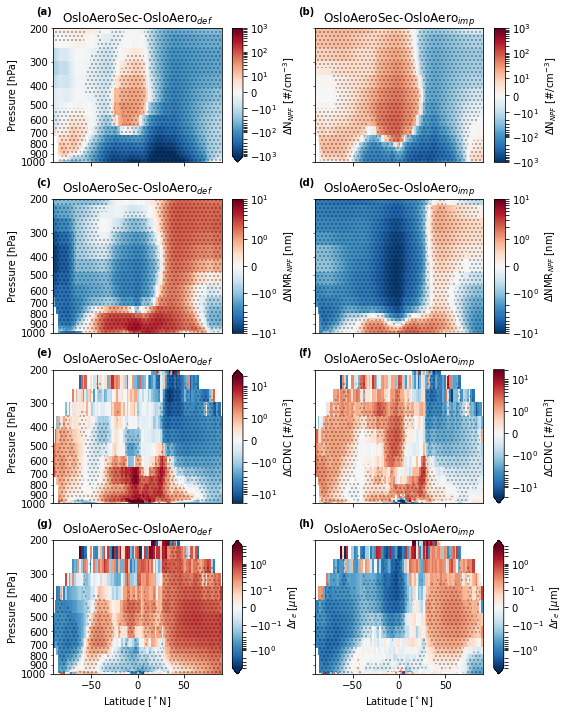

In [18]:
varlist = ['NCONC01', 'NMR01', 'AWNC_incld', 'AREL_incld']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases_ctrl)
nrow = len(varlist)
subfig_size = 2.5
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker
fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)

norm_dic = dict(
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1),# linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-20, vmax=20, linthresh=1),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1)
)
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var(var, case_oth, cases_ctrl, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          norm=norm_dic[var],
                          relative=False,
                          ylim=[1e3, 200],
                          yscale='log')
    t, T = load_and_plot_sign(case_oth, cases_ctrl, saxs, 
                              var, 
                              startyear, 
                              endyear, pressure_adjust=pressure_adjust,
                              avg_over_lev=avg_over_lev,
                              ci=.95,
                              groupby=None,
                              dims=('lon',),
                              area='Global',
                              avg_dim='time',
                              hatches=['...',''], hatch_lw = .3,
                              transform=None,
                              reverse=False)

for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()
fn = filen_base + f'N_clouds_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'

subp_insert_abc(axs)
plt.savefig(fn + '.pdf')
plt.savefig(fn + '.png')
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/NCONC01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/CLOUD_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/AWNC_incld_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/AREL_incld_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/NCONC01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/CLOUD_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/AWNC_incld_2008-01-2014-12.nc
L

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  app.launch_new_instance()
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-pack

Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NCONC01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/NCONC01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NCONC01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/NCONC01_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/CLOUD_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/CLOUD_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/CLOUD_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/CLOUD_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AWNC_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AWNC_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AREL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AREL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AREL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AREL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


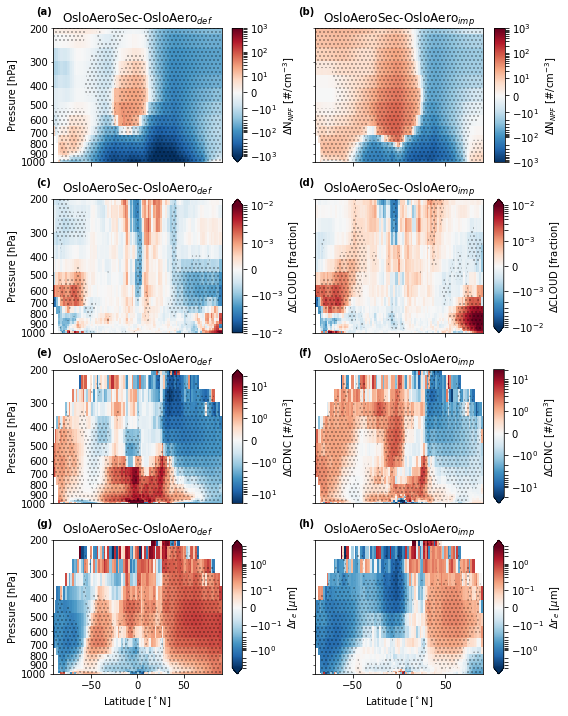

In [17]:
varlist = ['NCONC01', 'CLOUD', 'AWNC_incld', 'AREL_incld']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases_ctrl)
nrow = len(varlist)
subfig_size = 2.5
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker

cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

norm_dic = dict(
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1),# linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-20, vmax=20, linthresh=1),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1),
    CLOUD=colors.SymLogNorm(vmin=-.01, vmax=.01, linthresh=.001)
)

fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)


for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var(var, case_oth, cases_ctrl, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          norm=norm_dic[var],
                          relative=False,
                          ylim=[1e3, 200],
                          yscale='log')

    t, T = load_and_plot_sign(case_oth, cases_ctrl, saxs, 
                              var, 
                              startyear, 
                              endyear, pressure_adjust=pressure_adjust,
                              avg_over_lev=avg_over_lev,
                              ci=.95,
                              groupby=None,
                              dims=('lon',),
                              area='Global',
                              avg_dim='time',
                              hatches=['...',''], hatch_lw = .3,
                              transform=None,
                              reverse=False)

for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()
fn = filen_base + f'N_clouds_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'

subp_insert_abc(axs)
#plt.savefig(fn + '.pdf')
#plt.savefig(fn + '.png')
plt.show()

## Correlations:

In [10]:
from useful_scit.util.zarray import corr
from sectional_v2.util.plot.plot_levlat import plot_levlat

### Load data:

In [11]:
var_subl = ['NCONC01','AWNC_incld','AREL_incld','NMR01','HYGRO01','N_AER']
cases_dic = {}
for case in cases:

    dummy = get_field_fixed(case,
                        var_subl,
                        startyear, endyear,
                        pressure_adjust=pressure_adjust)
    cases_dic[case]=dummy.copy()

Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/NMR01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AWNC_incld_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AREL_incld_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/N_AER_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/HYGRO01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/

In [12]:
import matplotlib.ticker as mtick

In [13]:
cases_ctrl=cases_orig
case_oth = cases_sec[0]


def corr_plt(var_c=None, varl_to=None,cases_ctrl=None,
             case_oth = None):
    # %%
    if var_c is None:
        var_c = 'AWNC_incld'
    if varl_to is None:
        varl_to = ['NCONC01','NMR01']
    cbar_orientation = 'vertical'
    if cases_ctrl is None:
        cases_ctrl = cases_orig
    if case_oth is None:
        case_oth = cases_sec[0]
    ncol = len(cases_ctrl)
    nrow = len(varl_to)
    subfig_size = 2.5
    asp_ratio = 1.6
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)

    for j, var in enumerate(varl_to):
        saxs = axs[j, :]
        for i, case in enumerate(cases_ctrl):
            ax = saxs[i]
            _vars = [var, var_c]
            _ds = cases_dic[case_oth][_vars]- cases_dic[case][_vars]
            _da_corr = corr(_ds[var],_ds[var_c], dim=['time','lon'])
            nn_ctrl = get_nice_name_case(case)
            nn_oth = get_nice_name_case(case_oth)
            title =f'x={nn_oth}, y={nn_ctrl}'# f'Correlation $\Delta V = V_x - V_y$),\n x={nn_oth}, y={nn_ctrl}'
            _da_corr.load()
            label = f'corr($\Delta${get_fancy_var_name(var)},$\Delta${get_fancy_var_name(var_c)})'#)
            plt_kwargs ={}
            plt_kwargs = make_cbar_kwargs(label, plt_kwargs, cbar_orientation)
            

            plot_levlat(ax, 'RdBu_r', _da_corr, title, [1e3,200],
            #            cbar_orientation='vertical',
            #            #ax=ax,
            #            #norm=norm_dic[var],
            #            #relative=False,
            #            #ylim=[1e3, 200],
                        yscale='log', **plt_kwargs)
            ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
            ax.yaxis.set_minor_formatter(mtick.FormatStrFormatter('%.0f'))

    title = f'Correlations $\Delta V = V_x - V_y$'#' x={nn_oth}, y={nn_ctrl}'

    stit = plt.suptitle(title,y = 1.03)
    for ax in axs.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    for ax in axs[:, 0]:
        ax.set_ylabel('Pressure [hPa]')
    for ax in axs[-1, :]:
        ax.set_xlabel('Latitude [$^\circ$N]')
    fig.tight_layout()
    fn = filen_base + f'corr_NMR_N_clouds_{var_c}{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
    subp_insert_abc(axs, pos_x=1.13,pos_y=1.01)
    print(fn)
    plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,),bbox_inches='tight')
    plt.savefig(fn + '.png',bbox_extra_artists=(stit,),bbox_inches='tight')
    plt.show()
    # %%

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/l

/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/levlat//_v21ddcorr_NMR_N_clouds_AWNC_incldSECTv21_ctrl_koagDnoSECTv21_default_dd_noSECTv21_ox_ricc_dd2008-01-2014-12


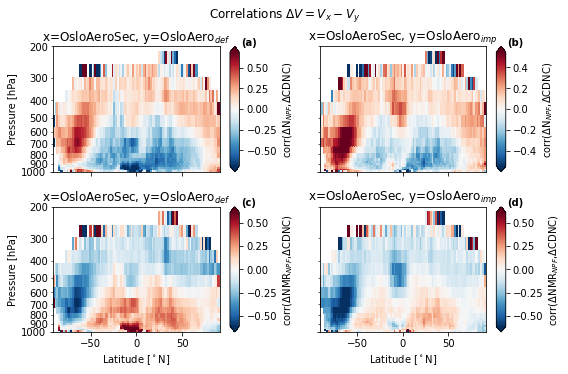

In [14]:
corr_plt()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/l

/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/levlat//_v21ddcorr_NMR_N_clouds_AREL_incldSECTv21_ctrl_koagDnoSECTv21_default_dd_noSECTv21_ox_ricc_dd2008-01-2010-12


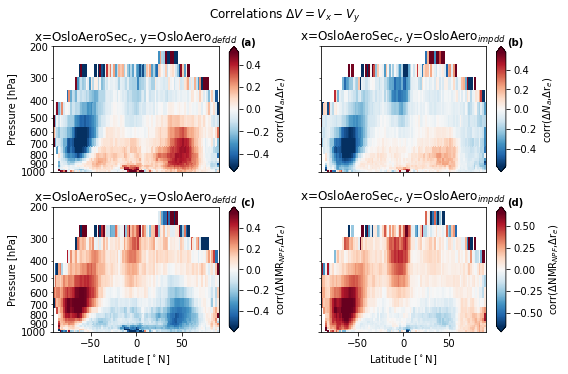

In [13]:
var_c = 'AREL_incld'
corr_plt(var_c,['N_AER','NMR01'])

In [ ]:
from useful_scit.util.zarray import corr
from sectional_v2.util.plot.plot_levlat import plot_levlat

In [ ]:
from sectional_v2.util.plot.plot_maps import subplots_map, fix_axis4map_plot, plt_map

In [ ]:
cases_ctrl=cases_orig
case_oth = cases_sec[0]


def corr_plt_latlon(var_c, varl_to, cases_ctrl=cases_orig, case_oth=cases_sec[0], cmap='RdBu_r', pmin=850.):
    # %%
    cbar_orientation = 'vertical'
    cases_ctrl = cases_orig
    case_oth = cases_sec[0]
    ncol = len(cases_ctrl)
    nrow = len(varl_to)
    subfig_size = 2.6
    asp_ratio = 1.6
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = subplots_map(nrow, ncol, figsize=figsize, sharex=True, sharey=True)

    norm_dic = dict(
        NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),
        NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=.1),
        AWNC_incld=colors.SymLogNorm(vmin=-20, vmax=20, linthresh=.1),
        AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1)
    )
    for j, var in enumerate(varl_to):
        saxs = axs[j, :]
        for i, case in enumerate(cases_ctrl):
            ax = saxs[i]
            _vars = [var, var_c]
            _ds = cases_dic[case_oth][_vars]- cases_dic[case][_vars]
            _ds = _ds.sel(lev=slice(pmin,None))
            _da_corr = corr(_ds[var],_ds[var_c], dim=['time','lev'])
            nn_ctrl = get_nice_name_case(case)
            nn_oth = get_nice_name_case(case_oth)
            title = f'Correlation $\Delta V = V_x - V_y$),\n x={nn_oth}, y={nn_ctrl}'
            _da_corr.load()
            label = f'corr($\Delta${get_fancy_var_name(var)},$\Delta${get_fancy_var_name(var_c)})'#)
            plt_kwargs ={}
            plt_kwargs = make_cbar_kwargs(label, plt_kwargs, cbar_orientation)

            plt_map(_da_corr, ax=ax, cmap=cmap,
            #            cbar_orientation='vertical',
            #            #ax=ax,
            #            #norm=norm_dic[var],
            #            #relative=False,
            #            #ylim=[1e3, 200],
                **plt_kwargs)
            
            ax.set_title(title)

    for ax in axs.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    #for ax in axs[:, 0]:
    #    ax.set_ylabel('Pressure [hPa]')
    for ax in axs[-1, :]:
        ax.set_xlabel('Latitude [$^\circ$N]')
    fig.tight_layout()
    #fn = filen_base + f'corr_NMR_N_clouds_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
    #plt.savefig(fn + '.pdf')
    #plt.savefig(fn + '.png')
    plt.show()
    # %%
    return _da_corr